In [109]:
#

In [110]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

#代替 input_dim
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
#最後合併
from tensorflow.keras.layers import concatenate, add

In [111]:
# Load Fashine MNIST
(X_train, y_train0), (X_test, y_test0) = datasets.fashion_mnist.load_data()

# Reshape size
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

In [112]:
print(X_train.shape)

(60000, 784)


In [125]:
x = Input(shape=(784,))
f_1 = Dense(500, activation='sigmoid')
f_2 = Dense(350, activation='sigmoid')
f_4 = Dense(250, activation='relu')
f_3 = Dense(10, activation='softmax')

In [126]:
h_1 = f_1(x)
h_2 = f_2(h_1)
z = f_4(h_1)
u = concatenate([h_2, z])
y = f_3(u)

In [127]:
model = Model(x, y)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_56 (Dense)                (None, 500)          392500      input_12[0][0]                   
__________________________________________________________________________________________________
dense_57 (Dense)                (None, 350)          175350      dense_56[0][0]                   
__________________________________________________________________________________________________
dense_58 (Dense)                (None, 250)          125250      dense_56[0][0]                   
____________________________________________________________________________________________

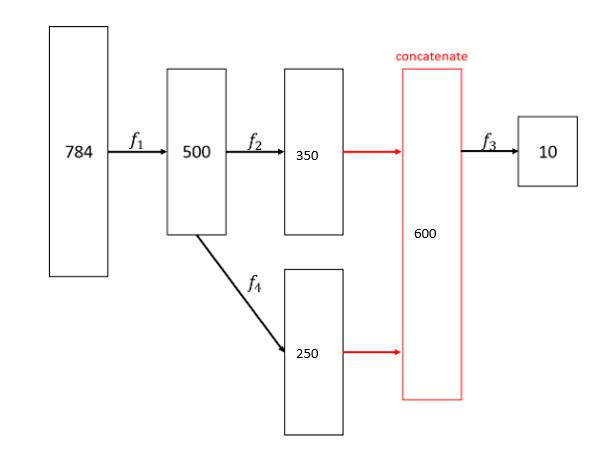

In [128]:
from IPython.display import Image
Image(filename="c:/users/haha0/desktop/圖片1.png")

In [129]:
model.compile(loss='mse', 
              optimizer=Adam(), 
              metrics=['accuracy'])

In [130]:
model.fit(X_train, y_train, 
          batch_size=256, 
          epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0409 - accuracy: 0.7016
Epoch 2/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0227 - accuracy: 0.8427
Epoch 3/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0206 - accuracy: 0.8572
Epoch 4/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0193 - accuracy: 0.8668
Epoch 5/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0184 - accuracy: 0.8734


In [131]:
model.save_weights('MNIST_Model.h5')

In [132]:
score = model.evaluate(X_train, y_train, batch_size=10000)
print(f'Loss: {score[0]}')
print(f'準確率: {score[1]*100}')

60000/60000 [==============================] - 1s 16us/sample - loss: 0.0183 - accuracy: 0.8739
Loss: 0.018327203889687855
準確率: 87.38666772842407


In [133]:
# 使用functionalAPI後反使準確率下降